In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [3]:
# TASK 1
iris_dataset = load_iris() # loaded the iris data

In [4]:
iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names) # changed the data to a pandas dataframe

In [5]:
iris_df.head()   # Display the first five rows using head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# checking for data types dtypes
print("Data Types:")
print(iris_df.dtypes)

Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In [7]:
# checking for missing values
print("\nMissing Values:")
print(iris_df.isnull().sum()) # sum() counts the number of missig values in each column
# In tye iris dataset there are no missing values


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [8]:
# Since there are no missing values, there is no need of cleaning the dataset by either filling or dropping any missing values.
# Task ONE completed

In [9]:
# TASK TWO
# Computing basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().
iris_df.describe()
# Mean [5.843333	3.057333	3.758000	1.199333]
# median [5.800000	3.000000	4.350000	1.300000]
# std  [0.828066	0.435866	1.765298	0.762238]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# How to erform groupings on a categorical column (for example, species, region, or department)
# and compute the mean of a numerical column for each group.

In [12]:
# To do this we first need to create a new column called "species" and map target to species names
iris_df['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

# After that, we need to group by species and compute the mean of a numerical column
mean_petal_length = iris_df.groupby('species', observed=False)['petal length (cm)'].mean()

In [13]:
# Displaying the result
print("Mean petal length for each species:")
print(mean_petal_length)

Mean petal length for each species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64


In [16]:
# IDENTIFIABLE PATTERNS AND FINDINGS IN MY ANALYSIS
# Setosa has the smallest petal length (1.462 cm).
# Versicolor has a moderate petal length (4.260 cm).
# Virginica has the largest petal length (5.552 cm).
# The petal length increases progressively from Setosa to Versicolor to Virginica

CategoricalIndex(['setosa', 'versicolor', 'virginica'], categories=['setosa', 'versicolor', 'virginica'], ordered=False, dtype='category', name='species')

C:\Users\san\AppData\Local\Temp\ipykernel_15284\1444362821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_petal_length.index, y=mean_petal_length.values, palette='viridis')


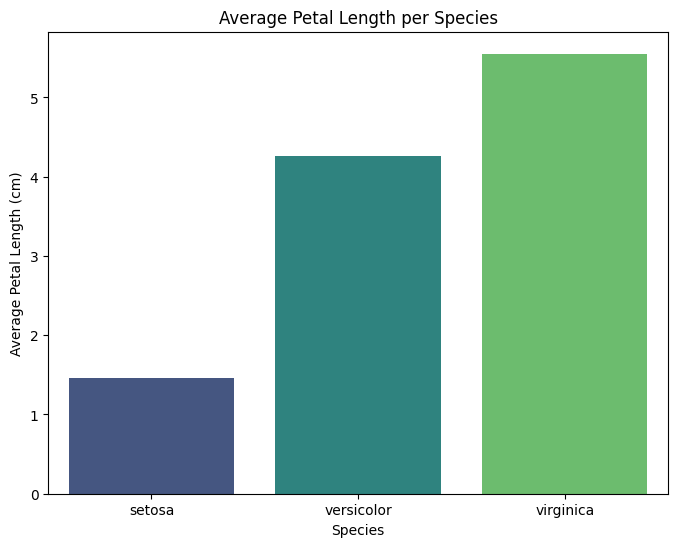

In [22]:
# TASK 3
# BARCHART SHOWING THE AVERAGE PETAL LENGTH PER SPECIE
plt.figure(figsize=(8, 6))  # sets figure width 8 inches and height 6 inches
sns.barplot(x=mean_petal_length.index, y=mean_petal_length.values, palette='viridis')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()

In [ ]:
# Observations from the barchart above
# Setosa has the smallest petal length followed by versicolor then Virginica

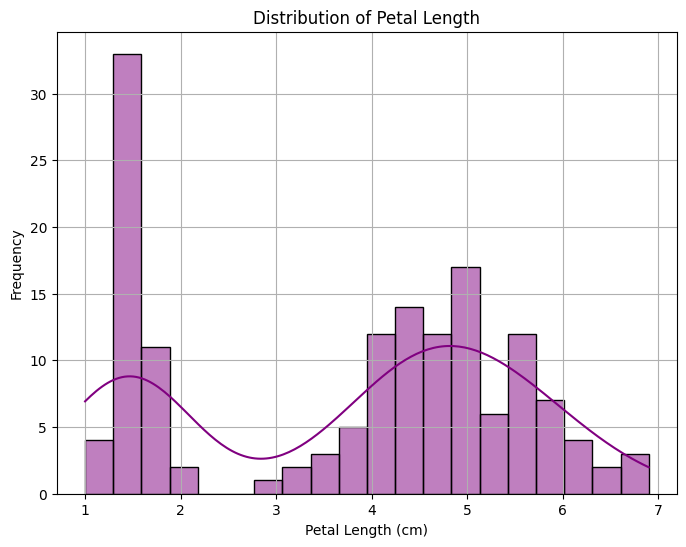

In [23]:
# HISTOGRAM
# hISTOGRAM OF DISTRIBUTION OF PETAL LENGTH
plt.figure(figsize=(8, 6))
sns.histplot(iris_df['petal length (cm)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Observations from the above Histogram
# The distribution is skewed, tend to concentrate on a certain group i.e 1 - 2cm, 3-7cm
# Since setosa has an average petal lenth of 1.42, it has the highest frequency as the range between 1cm to 2cm has the highest frequebcy


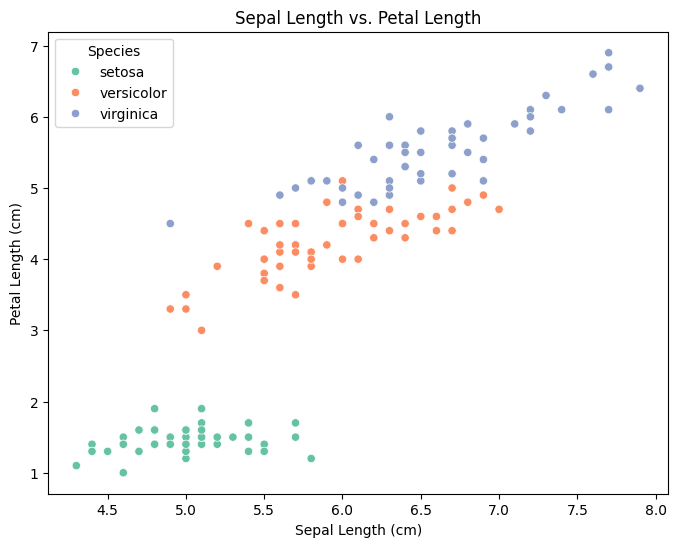

In [24]:
# SCATTER PLOT
# SCATTER PLOT SHOWING THE RELATIONSHIP BETWEEN SEPAL LENGTH AND PETAL LENGTH
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['petal length (cm)'], hue=iris_df['species'], palette='Set2')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

In [ ]:
# Observation on the Scatterplot above of Sepal lenght and Petal length
# There seems to be a postive correlation between Sepal length and Petal length. As Sepal length increases, Petal lemgth seem to also increase

In [ ]:
# Since I've explicitly used the iris dataset, a line chart is not suitable for this type of dataset. I cannot find suitable features that can be used to create a line chart.